# 範例

In [ ]:
from datetime import datetime
import backtrader as bt

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

data0 = bt.feeds.YahooFinanceData(dataname='./backtrader-master/datas/orcl-1995-2014.txt', fromdate=datetime(2011, 1, 1),
                                  todate=datetime(2012, 12, 31))
cerebro.adddata(data0)

cerebro.run()
cerebro.plot()

# SMA

## 股票

In [ ]:
from datetime import datetime
import backtrader as bt
from BaseStrategyFrame import BaseStrategyFrame
class SmaStrategy(BaseStrategyFrame):
    
    params = (("maperiod",15),)
    
    def __init__(self):

        super(SmaStrategy, self).__init__()
#         print("printlog:", self.params.printlog)
#         print("maperiod:", self.params.maperiod)
        
        self.sma = bt.indicators.SimpleMovingAverage(
            self.dataclose,period=self.params.maperiod
        )
    def next(self):
        self.log(
            "O:{:.2f}, H:{:.2f}, L:{:.2f}, C:{:.2f}".format(
                self.dataopen[0], self.datahigh[0], self.datalow[0],self.dataclose[0]
            )
        )
        
        if self.order: # 檢查是否有指令等待執行,
            return

        if not self.position: # 沒有持倉
        #執行買入條件判斷：收盤價格上漲突破15日均線
            if self.dataclose[0] > self.sma[0]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                #執行買入
                self.order = self.buy()
        else:
            #執行賣出條件判斷：收盤價格跌破15日均線
            if self.dataclose[0] < self.sma[0]:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                #執行賣出
                self.order = self.sell()
   
    
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaStrategy)

data0 = bt.feeds.YahooFinanceData(dataname='BTC_hour.csv', fromdate=datetime(2010,1,1),
                                  todate=datetime(2012, 12, 31))
cerebro.adddata(data0)

cerebro.run()
cerebro.plot()

## BTC

=== Backtesting Start! ===
=== Backtesting Finished! ===


<IPython.core.display.Javascript object>


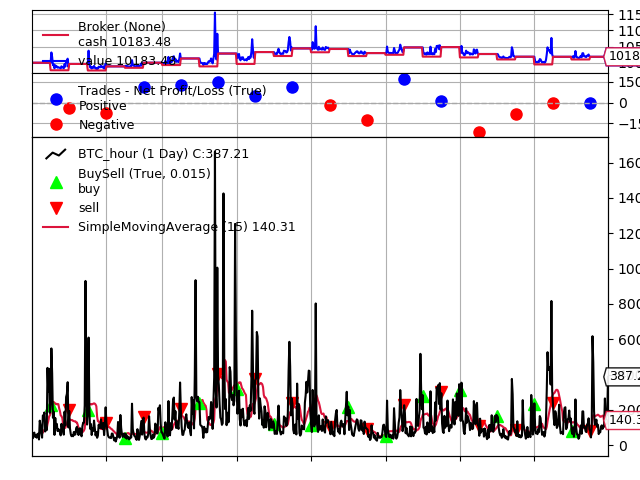

[[<Figure size 640x480 with 4 Axes>]]

In [1]:
from datetime import datetime
import backtrader as bt
from BaseStrategyFrame import BaseStrategyFrame
class SmaStrategy(BaseStrategyFrame):
    
    params = (("maperiod",15),)
    
    def __init__(self):

        super(SmaStrategy, self).__init__()
#         print("printlog:", self.params.printlog)
#         print("maperiod:", self.params.maperiod)
        
        self.sma = bt.indicators.SimpleMovingAverage(
            self.dataclose,period=self.params.maperiod
        )
    def next(self):
        self.log(
            "O:{:.2f}, H:{:.2f}, L:{:.2f}, C:{:.2f}".format(
                self.dataopen[0], self.datahigh[0], self.datalow[0],self.dataclose[0]
            )
        )
        
        if self.order: # 檢查是否有指令等待執行,
            return

        if not self.position: # 沒有持倉
        #執行買入條件判斷：收盤價格上漲突破15日均線
            if self.dataclose[0] > self.sma[0]:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                #執行買入
                self.order = self.buy()
        else:
            #執行賣出條件判斷：收盤價格跌破15日均線
            if self.dataclose[0] < self.sma[0]:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                #執行賣出
                self.order = self.sell()
   
    
cerebro = bt.Cerebro()
cerebro.addstrategy(SmaStrategy)

data0 = bt.feeds.YahooFinanceData(dataname='BTC_hour.csv', fromdate=datetime(2020,8,25),
                                  todate=datetime(2020, 9, 25))
cerebro.adddata(data0)

cerebro.run()
cerebro.plot()